### Análises e Gráficos de informações pessoais de Discentes

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
discentes_info = pd.read_csv('../../data/processed/discentes_info.csv')

In [3]:
discentes_info

,sexo,raca,municipio,curso,ano_ingresso
0,M,Branco,NATAL,SISTEMAS DE INFORMAÇÃO,2009
1,M,Não Informado,CAICÓ,SISTEMAS DE INFORMAÇÃO,2009
2,M,Não Informado,CAICÓ,SISTEMAS DE INFORMAÇÃO,2009
3,M,Branco,CAICÓ,SISTEMAS DE INFORMAÇÃO,2009
4,M,Branco,CAICÓ,SISTEMAS DE INFORMAÇÃO,2009
...,...,...,...,...,...
847,M,Pardo,CAICÓ,SISTEMAS DE INFORMAÇÃO,2025
848,M,Branco,CAICÓ,SISTEMAS DE INFORMAÇÃO,2025
849,M,Branco,NATAL,SISTEMAS DE INFORMAÇÃO,2025
850,M,Pardo,NATAL,SISTEMAS DE INFORMAÇÃO,2025


In [4]:
# Função para criar gráfico de pizza
def grafico_pizza(df_counts, coluna_cat, coluna_count, titulo, nome_arquivo, cores=None, explode_val=0.01, figsize=(7,7)):
    if cores is None:
        import matplotlib.cm as cm
        cores = cm.Pastel1.colors
    
    explode = [explode_val] * len(df_counts)

    def format_label(pct, allvals):
        total = sum(allvals)
        valor_absoluto = int(round(pct * total / 100.0))
        return f"{pct:.1f}%\n({valor_absoluto})"
    
    plt.figure(figsize=figsize)
    plt.pie(
        df_counts[coluna_count],
        labels=df_counts[coluna_cat],
        autopct=lambda pct: format_label(pct, df_counts[coluna_count]),
        startangle=90,
        colors=cores[:len(df_counts)],
        explode=explode,
        wedgeprops={'edgecolor': 'white'}
    )
    plt.title(titulo, fontsize=14)
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig(f'../../assets/{nome_arquivo}.png', dpi=300, bbox_inches='tight')
    plt.show()

In [5]:
# Visualizando a distribuição de discentes por sexo
df_sexos = discentes_info['sexo'].value_counts().reset_index()
df_sexos

,sexo,count
0,M,704
1,F,148


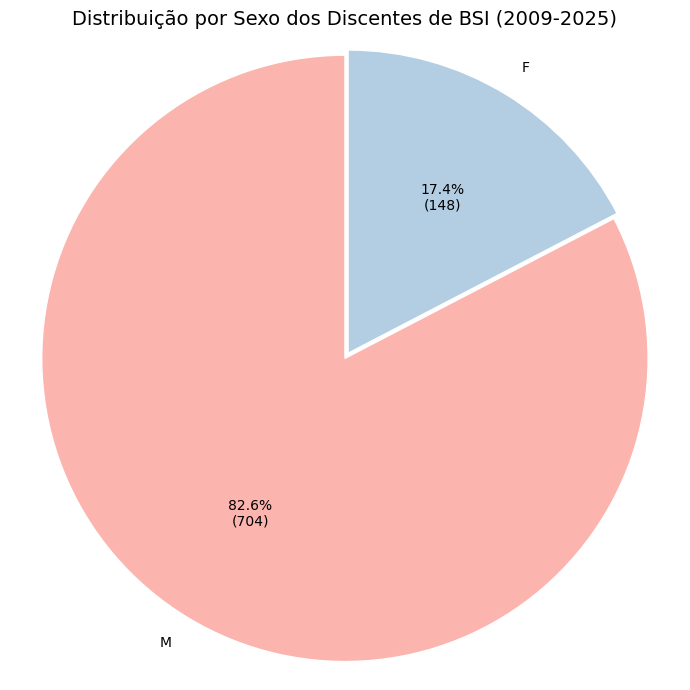

In [6]:
# Gerando o gráfico de pizza
grafico_pizza(df_sexos, 'sexo', 'count', 'Distribuição por Sexo dos Discentes de BSI (2009-2025)', 'sexo_discentes')

In [7]:
# Visualizando a distribuição de discentes por raça
df_raca = discentes_info['raca'].value_counts().reset_index()
df_raca

,raca,count
0,Branco,425
1,Pardo,317
2,Não Informado,56
3,Negro,49
4,Indígena,5


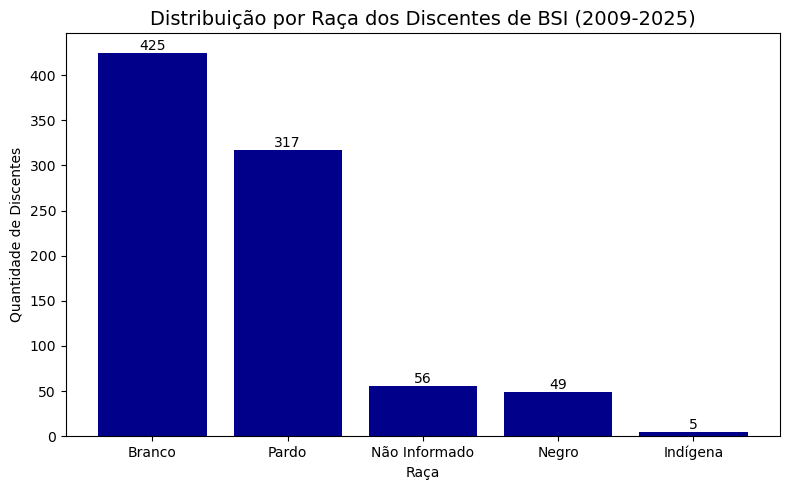

In [8]:
# Gerando o gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(df_raca['raca'], df_raca['count'], color='darkblue')

plt.title('Distribuição por Raça dos Discentes de BSI (2009-2025)', fontsize=14)
plt.xlabel('Raça')
plt.ylabel('Quantidade de Discentes')

for i, valor in enumerate(df_raca['count']):
    plt.text(i, valor + 3, str(valor), ha='center')

plt.tight_layout()
plt.savefig('../../assets/raca_discentes.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
# Visualizando a distribuição de discentes por município
df_municipios = discentes_info['municipio'].value_counts().reset_index().head(5)
df_municipios

,municipio,count
0,CAICÓ,395
1,NATAL,110
2,PARELHAS,39
3,JARDIM DO SERIDÓ,32
4,JARDIM DE PIRANHAS,28


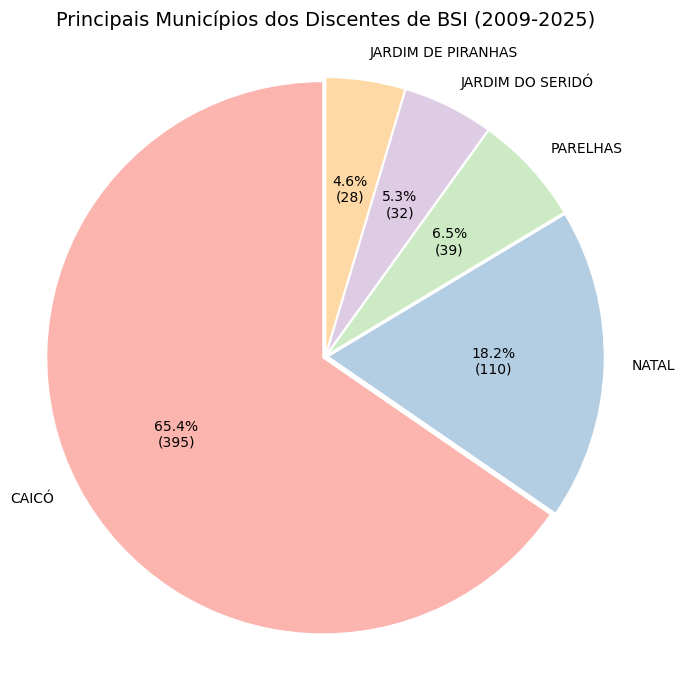

In [10]:
# Gerando o gráfico de pizza
grafico_pizza(df_municipios, 'municipio', 'count', 'Principais Municípios dos Discentes de BSI (2009-2025)', 'municipios_discentes')

In [11]:
# Visualizando a distribuição de discentes por ano de ingresso
df_ano_ingresso = discentes_info['ano_ingresso'].value_counts().reset_index().sort_values(by='ano_ingresso')
df_ano_ingresso

,ano_ingresso,count
4,2009,53
9,2010,51
2,2011,55
10,2012,50
16,2013,38
3,2014,54
13,2015,47
15,2016,42
8,2017,52
14,2018,44


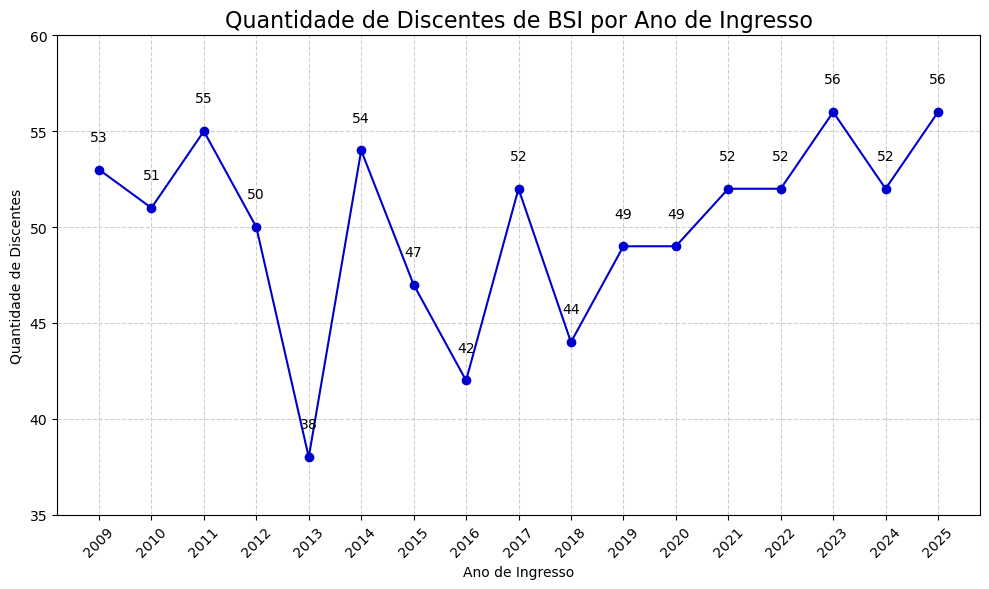

In [12]:
# Gerando o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(df_ano_ingresso['ano_ingresso'], df_ano_ingresso['count'], marker='o', linestyle='-', color='mediumblue')

plt.title('Quantidade de Discentes de BSI por Ano de Ingresso', fontsize=16)
plt.xlabel('Ano de Ingresso')
plt.ylabel('Quantidade de Discentes')
plt.grid(True, linestyle='--', alpha=0.6)

plt.ylim(35, 60)

anos = np.arange(df_ano_ingresso['ano_ingresso'].min(), df_ano_ingresso['ano_ingresso'].max() + 1, 1)
plt.xticks(anos, rotation=45)

for x, y in zip(df_ano_ingresso['ano_ingresso'], df_ano_ingresso['count']):
    plt.text(x, y + 1.5, str(y), ha='center')

plt.tight_layout()
plt.savefig('../../assets/ingressos_por_ano.png', dpi=300, bbox_inches='tight')
plt.show()